In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load data
dataA = pd.read_csv("data/dataA.csv", header=None).values
dataB = pd.read_csv("data/dataB.csv", header=None).values

X1_A, X2_A, y_A = dataA[1:, 0], dataA[1:, 1], dataA[1:, 2]
X1_B, X2_B, y_B = dataB[1:, 0], dataB[1:, 1], dataB[1:, 2]
n = len(y_A)  # Number of samples


X1_A, X2_A, y_A = X1_A.astype(float), X2_A.astype(float), y_A.astype(float)
X1_B, X2_B, y_B = X1_B.astype(float), X2_B.astype(float), y_B.astype(float)
# print(X1_A)
# # print(type(X1_A))
# # print(X1_A.astype(float))
# print(X2_A)
# print(X1_B)
# print(X2_B)
# print(y_A)
# print(y_B)

[ 7.01882944  4.56625918  3.57610939 ...  8.0522295  13.07649053
 11.61285934]
[0.09037284 4.36826249 0.98206628 ... 0.94552516 2.822618   3.46659045]
[2.59893378 3.3999659  2.79300145 ... 0.79852398 2.79318149 3.94280559]
[0.87573506 3.65116546 0.08759667 ... 0.34434307 1.10464963 2.98614464]
[ 64.36641696 183.60531169  69.45792131 ... 161.7994574  483.91670361
 513.71761487]
[-2.80741321  2.66034003  4.15946503 ... -4.65498966  0.47580361
  8.51609307]


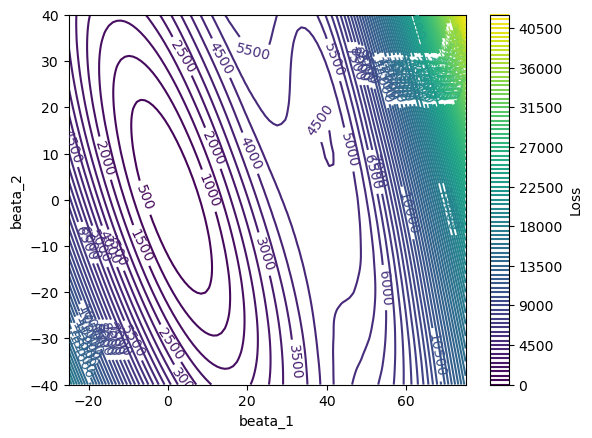

In [ ]:
def compute_loss(beta_1, beta_2):
    beta_1 = float(beta_1)
    beta_2 = float(beta_2)
    loss = 0.0
    for i in range(n):
        loss_A = (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i]) ** 2
        loss_B = (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i]) ** 2
        loss += 0.5 * (1 / n) * min(loss_A, loss_B)
    return loss

def plot_contour(beta_1_range, beta_2_range):
    beta_1_grid = np.linspace(beta_1_range[0], beta_1_range[1], 100)
    beta_2_grid = np.linspace(beta_2_range[0], beta_2_range[1], 100)
    beta_1_mesh, beta_2_mesh = np.meshgrid(beta_1_grid, beta_2_grid)
    loss_grid = np.vectorize(compute_loss)(beta_1_mesh, beta_2_mesh)
    CS = plt.contour(beta_1_mesh, beta_2_mesh, loss_grid, levels=100, cmap="viridis")
    plt.clabel(CS, CS.levels, fontsize=10)
    plt.colorbar(label="Loss")
    plt.xlabel("beta_1")
    plt.ylabel("beta_2")

plot_contour([-25, 75], [-40, 40])

In [ ]:
def compute_gradient(beta_1, beta_2):
    dbeta_1, dbeta_2 = 0.0, 0.0
    for i in range(n):
        loss_A = (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i]) ** 2
        loss_B = (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i]) ** 2
        if loss_A < loss_B:
            dbeta_1 += -(1 / n) * X1_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
            dbeta_2 += -(1 / n) * X2_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
        else:
            dbeta_1 += -(1 / n) * X1_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
            dbeta_2 += -(1 / n) * X2_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
    return dbeta_1, dbeta_2

def gradient_descent(learning_rate, iterations, beta__init):
    beta_1, beta_2 = beta__init
    trajectory = [(beta_1, beta_2)]
    for _ in range(iterations):
        dbeta_1, dbeta_2 = compute_gradient(beta_1, beta_2)
        beta_1 -= learning_rate * dbeta_1
        beta_2 -= learning_rate * dbeta_2
        trajectory.append((beta_1, beta_2))
    return beta_1, beta_2, trajectory

In [50]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(learning_rate, iterations, beta_init, batch_size):
    beta_1, beta_2 = beta_init
    trajectory = [(beta_1, beta_2)]
    for _ in range(iterations):
        indices = np.random.choice(n, batch_size, replace=False)
        dbeta_1, dbeta_2 = 0.0, 0.0
        for i in indices:
            loss_A = (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i]) ** 2
            loss_B = (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i]) ** 2
            if loss_A < loss_B:
                dbeta_1 += -(1 / batch_size) * X1_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
                dbeta_2 += -(1 / batch_size) * X2_A[i] * (y_A[i] - beta_1 * X1_A[i] - beta_2 * X2_A[i])
            else:
                dbeta_1 += -(1 / batch_size) * X1_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
                dbeta_2 += -(1 / batch_size) * X2_B[i] * (y_B[i] - beta_1 * X1_B[i] - beta_2 * X2_B[i])
        beta_1 -= learning_rate * dbeta_1
        beta_2 -= learning_rate * dbeta_2
        trajectory.append((beta_1, beta_2))
    return beta_1, beta_2, trajectory

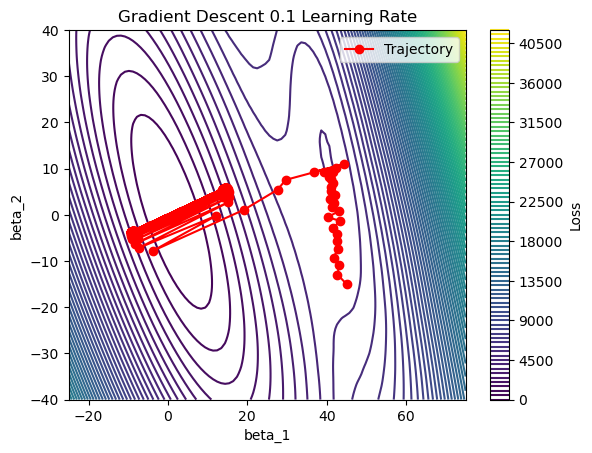

In [ ]:
# Plotting the results
def plot_trajectories(trajectory, beta_1_range, beta_2_range, title = "Loss Contour and Trajectory"):
    beta_1_grid = np.linspace(beta_1_range[0], beta_1_range[1], 100)
    beta_2_grid = np.linspace(beta_2_range[0], beta_2_range[1], 100)
    beta_1_mesh, beta_2_mesh = np.meshgrid(beta_1_grid, beta_2_grid)
    loss_grid = np.vectorize(compute_loss)(beta_1_mesh, beta_2_mesh)
    plt.contour(beta_1_mesh, beta_2_mesh, loss_grid, levels=100, cmap="viridis")
    plt.colorbar(label="Loss")
    plt.xlabel("beta_1")
    plt.ylabel("beta_2")
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], color="red", marker="o", label="Trajectory")
    plt.legend()
    plt.title(title)
    plt.show()

# Run Gradient Descent
beta_init = (45.0, -15.0)

learning_rate = 0.1
iterations = 200
beta_1, beta_2, trajectory = gradient_descent(learning_rate, iterations, beta_init)

plot_trajectories(trajectory, [-25, 75], [-40, 40], "Gradient Descent 0.1 Learning Rate")

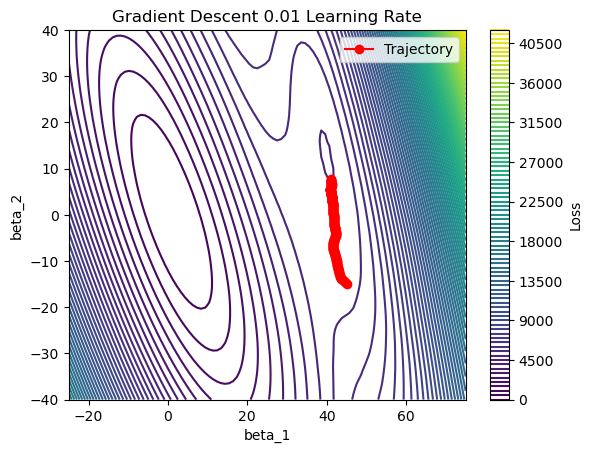

In [ ]:
learning_rate = 0.01
iterations = 200
beta_1, beta_2, trajectory = gradient_descent(learning_rate, iterations, beta_init)

# Plot Gradient Descent
plot_trajectories(trajectory, [-25, 75], [-40, 40], "Gradient Descent 0.01 Learning Rate")

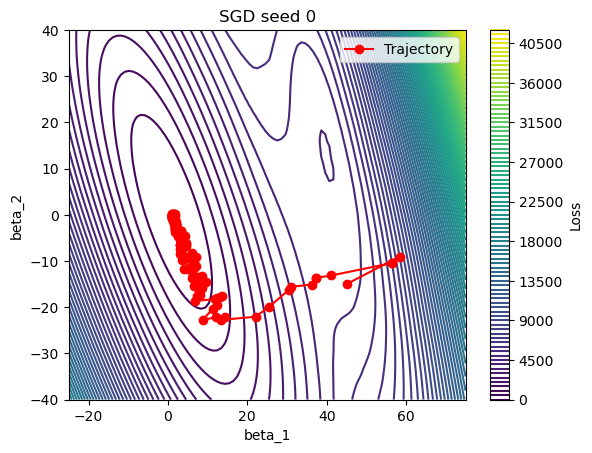

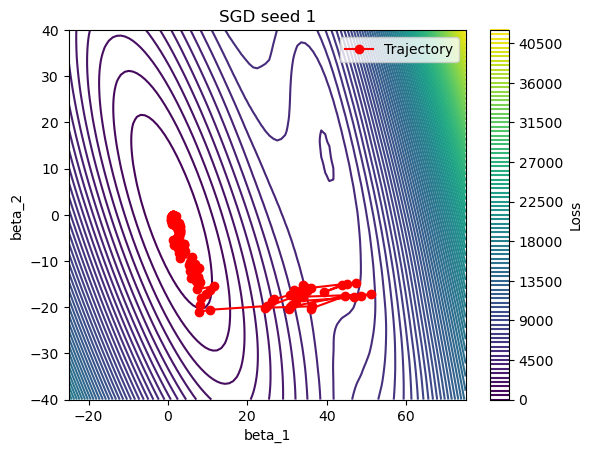

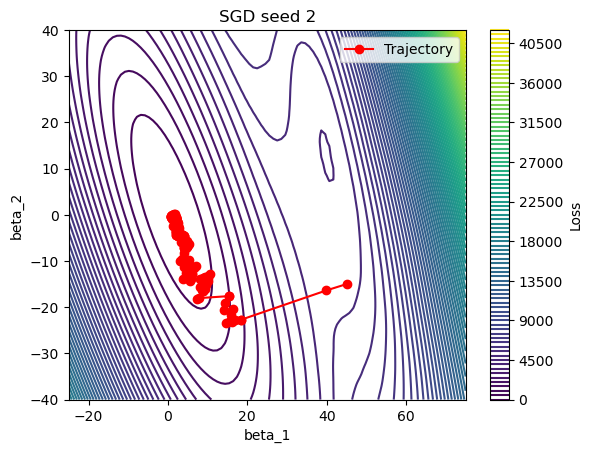

In [51]:
# Run Stochastic Gradient Descent
beta_init = (45.0, -15.0)
learning_rate = 0.01

tradjs = []
for i in range(3):
    beta_1_sgd, beta_2_sgd, sgd_trajectory = stochastic_gradient_descent(learning_rate, iterations, beta_init, batch_size=1)
    tradjs.append(sgd_trajectory)

# Plot Stochastic Gradient Descent
for i in range(3):
    plot_trajectories(tradjs[i], [-25, 75], [-40, 40], f"SGD seed {i}")